In [ ]:
from scipy.stats import mode
import numpy as np
#from mnist import MNIST
from time import time
import pandas as pd
import os
import matplotlib.pyplot as matplot
import matplotlib
from tqdm import tqdm
%matplotlib inline

import random
matplot.rcdefaults()
from IPython.display import display, HTML
from itertools import chain
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import seaborn as sb
from sklearn.model_selection import ParameterGrid
from sklearn.svm import SVC, LinearSVC
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

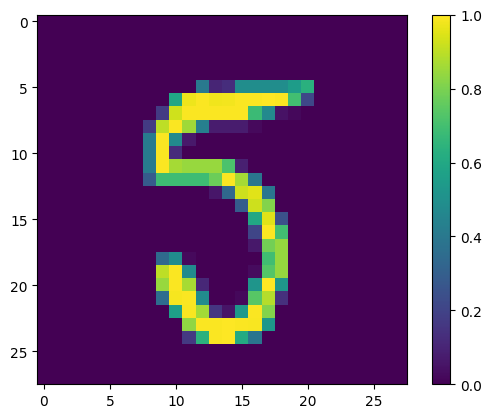

In [ ]:
matplot.figure()
matplot.imshow(x_train[2000].reshape(28,28))
matplot.colorbar()
matplot.grid(False)
matplot.show()

In [ ]:
x_train = x_train.reshape(-1,28*28) / 255.0

In [ ]:
x_test = x_test.reshape(-1,28*28) / 255.0

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,random_state=42,stratify=y_train,test_size=0.2)

In [ ]:
x_train.shape,y_train.shape

((48000, 784), (48000,))

# Linear SVC
یک مدل 

*SVM*

خطی روی داده‌ها آموزش می‌دهیم تا ببینیم این مدل به طور کلی چگونه روی داده‌ها عمل می‌کند.

In [ ]:
svm = LinearSVC(dual=False,verbose=1,random_state=42)
svm.fit(x_train, y_train)

[LibLinear]

LinearSVC(dual=False, random_state=42, verbose=1)

In [ ]:
print("Coefficient shape:",svm.coef_.shape)
print("Intercept:",svm.intercept_)

Coefficient shape: (10, 784)
Intercept: [-1.22719692 -0.18486727 -0.81790598 -1.20177525 -0.51056394  0.02006944
 -1.20586715 -0.27287442 -2.1006683  -1.3376887 ]


In [ ]:
pred = svm.predict(x_val)

In [ ]:
accuracy_score(y_val, pred) # Accuracy

0.9149166666666667

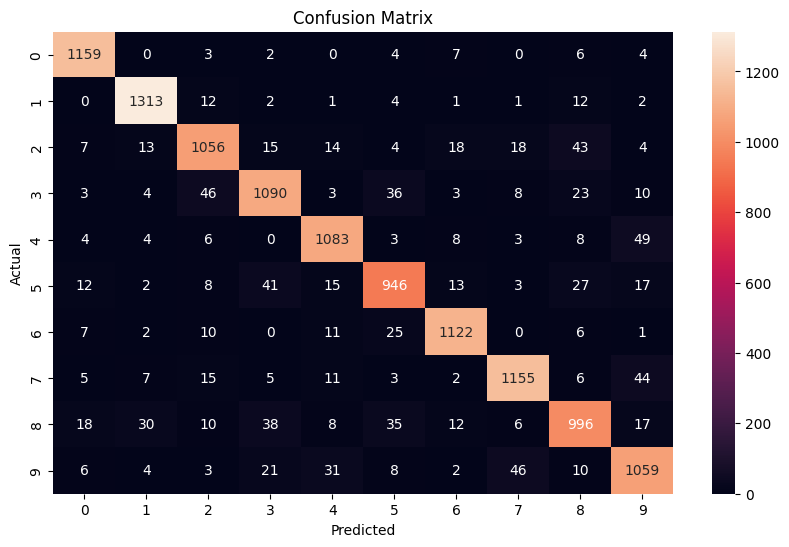

In [ ]:
cm = confusion_matrix(y_val, pred)
matplot.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
matplot.xlabel("Predicted")
matplot.ylabel("Actual")
matplot.title("Confusion Matrix")
matplot.show()

می‌بینیم که 

*SVM*

در کلاس‌بندی داده‌ها خوب کار می‌کند. 
در کلاس‌های 
۵-۸
و 
۲-۸
و 
۵-۳
و
۴-۹
هنوز مقداری خطا داریم ولی در کل
دقت ۹۱ درصد بسیار خوب است.

## Running Linear SVC for multiple cost factor(s) $C$
با مقادیر مختلف 
$C$
مدل اس وی ام خطی می‌سازیم و آن را آموزش می‌دهیم تا بهترین مقدار آن را پیدا کنیم.

In [ ]:
acc = []
acc_tr = []
coefficient = []
for c in tqdm([0.0001,0.001,0.01,0.1,1,10,100,1000,10000]):
    svm = LinearSVC(dual=False, C=c,random_state=42)
    svm.fit(x_train, y_train)
    coef = svm.coef_
    
    p_tr = svm.predict(x_train)
    a_tr = accuracy_score(y_train, p_tr)
    
    pred = svm.predict(x_val)
    a = accuracy_score(y_val, pred)
    
    coefficient.append(coef)
    acc_tr.append(a_tr)
    acc.append(a)

100%|██████████| 9/9 [10:39<00:00, 71.09s/it] 


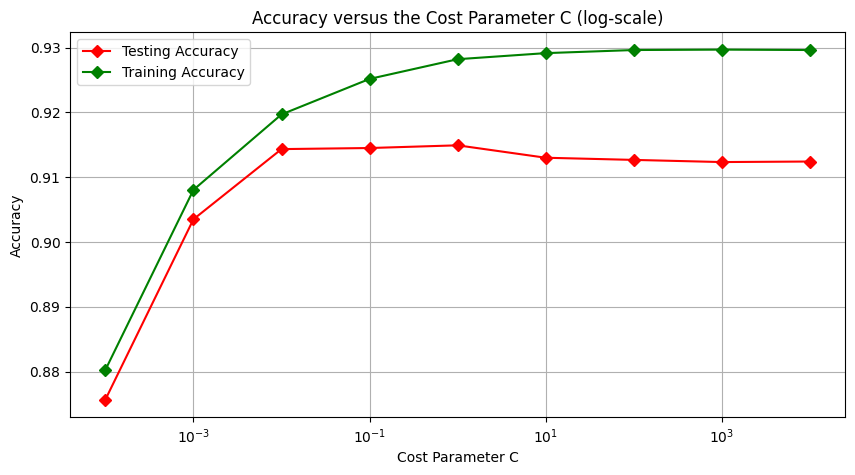

In [ ]:
c = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

matplot.subplots(figsize=(10, 5))
matplot.semilogx(c, acc,'-gD' ,color='red' , label="Testing Accuracy")
matplot.semilogx(c, acc_tr,'-gD' , label="Training Accuracy")
#matplot.xticks(L,L)
matplot.grid(True)
matplot.xlabel("Cost Parameter C")
matplot.ylabel("Accuracy")
matplot.legend()
matplot.title('Accuracy versus the Cost Parameter C (log-scale)')
matplot.show()

می‌توانیم در این نمودار به راحتی مبادله‌ی بایاس واریانس را ببینیم. 
هر چقدر 
$C$
افزایش می‌یابد دقت مدل روی داده‌های آموزشی زیاد می‌شود ولی تنها تا جایی که
$C=1$
است دقت مدل روی داده‌های ولیدیشین نیز افزایش می‌یابد و پس از آن شاهد
$overfit$
هستیم.
پس از چپ به راست در نمودار ما بایاس کاهش می‌یابد و واریانس افزایش می‌یابد.

## We choose the model with best testing accuracy
مدل با بهترین دقت را انتخاب می‌کنیم

In [ ]:
np.argmax(acc)

4

In [ ]:
svm_coef = coefficient[4]
svm_coef.shape

(10, 784)

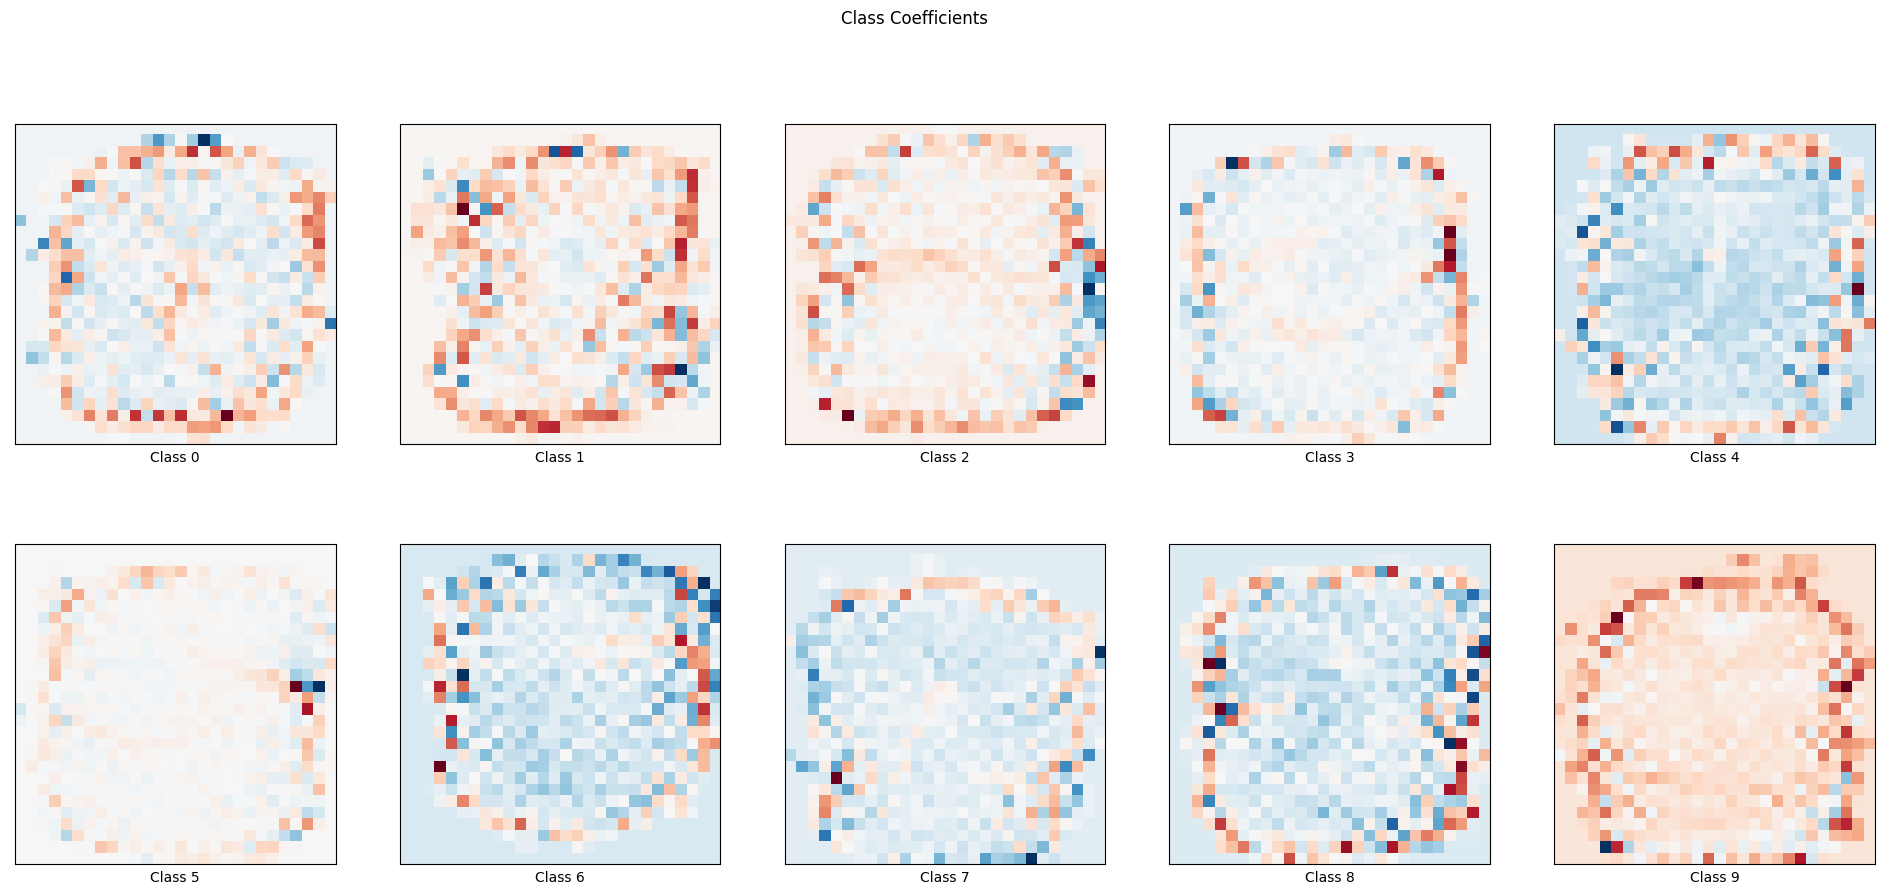

In [ ]:
matplot.subplots(2,5, figsize=(24,10))
for i in range(10):
    l1 = matplot.subplot(2, 5, i + 1)
    l1.imshow(svm_coef[i].reshape(28, 28), cmap=matplot.cm.RdBu)
    l1.set_xticks(())
    l1.set_yticks(())
    l1.set_xlabel('Class %i' % i)
matplot.suptitle('Class Coefficients')
matplot.show()

اگر روی همین داده‌ها مدل 

Naive Bayes

یا 

Logisitic Regression

را اجرا کنیم و ضرایب مربوط به فیچرها را روی تصویر نشان دهیم بسیار متفاوت خواهد بود. در مدل بیزین ساده تقریبا عدد مورد نظر در ضرایب قابل تشخیص است. در حالی که در رگرسیون لجستیک پترن‌های متفاوتی برای کلاس‌های متفاوت دیده می‌شود. در حالی که در اینجا ما هیچ پترن مشخصی نمی‌بینیم و کلاس‌های مختلف را نمی‌توانیم به صورت چشمی از ضرایب فیچرهای آنها در مدل ترین شده تشخیص دهیم.

## Linear SVC with Penalty: l1
این بار مدل $SVM$
خطی را با رگولاریزیشن
$l_1$
برای ضرایب مختلف امتحان می‌کنیم.

In [ ]:
acc = []
acc_tr = []
coefficient = []
for c in tqdm([0.0001,0.001,0.01,0.1,1,10,100,1000,10000]):
    svm = LinearSVC(dual=False, C=c, penalty='l1')
    svm.fit(x_train, y_train)
    coef = svm.coef_
    
    p_tr = svm.predict(x_train)
    a_tr = accuracy_score(y_train, p_tr)
    
    pred = svm.predict(x_val)
    a = accuracy_score(y_val, pred)
    
    coefficient.append(coef)
    acc_tr.append(a_tr)
    acc.append(a)

100%|██████████| 9/9 [34:40<00:00, 231.16s/it]


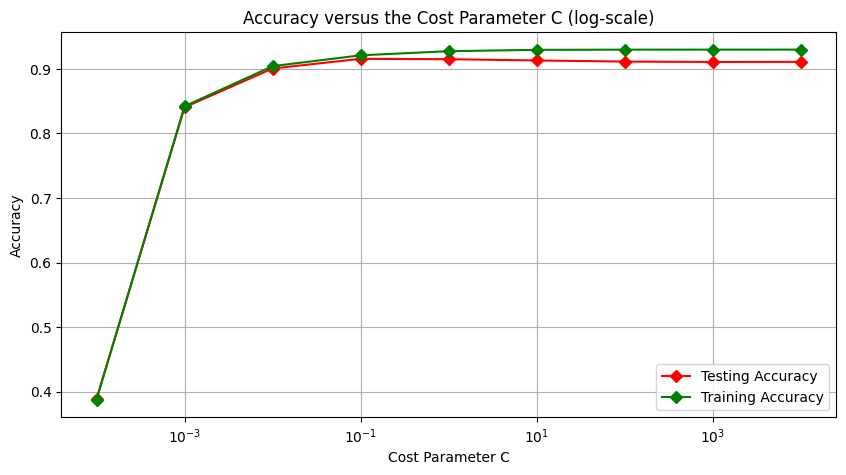

In [ ]:
c = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

matplot.subplots(figsize=(10, 5))
matplot.semilogx(c, acc,'-gD' ,color='red' , label="Testing Accuracy")
matplot.semilogx(c, acc_tr,'-gD' , label="Training Accuracy")
#matplot.xticks(L,L)
matplot.grid(True)
matplot.xlabel("Cost Parameter C")
matplot.ylabel("Accuracy")
matplot.legend()
matplot.title('Accuracy versus the Cost Parameter C (log-scale)')
matplot.show()

نتایج مقدار خیلی زیادی به آزمایش قبل شباهت دارند.
مبادله‌ی بایاس واریانس را در نمودار بالا شاهد هستیم.
هر چه 
$C$
بالاتر می‌رود دقت مدل روی داده‌های ولیدیشن نیز بیشتر می‌شود ولی فقط تا جایی که
$C=0.1$
است. در مقادیر بالاتر شاهد اورفیت هستیم.

تفاوت استفاده از 
$l_1$
این است که اثر اورفیت را کمتر می‌کند و اینکه مدل در مقادیر
$C$
پایین بسیار بدتر عمل می‌کند.

همچنین در این نمودار نیز از چپ به راست بایاس کاهش می‌یابد و واریانس افزایش می‌یابد.

## Once more, we choose the model with best testing accuracy i.e. c = 1

In [ ]:
np.argmax(acc)

3

In [ ]:
svm_coef = coefficient[3]
svm_coef.shape

(10, 784)

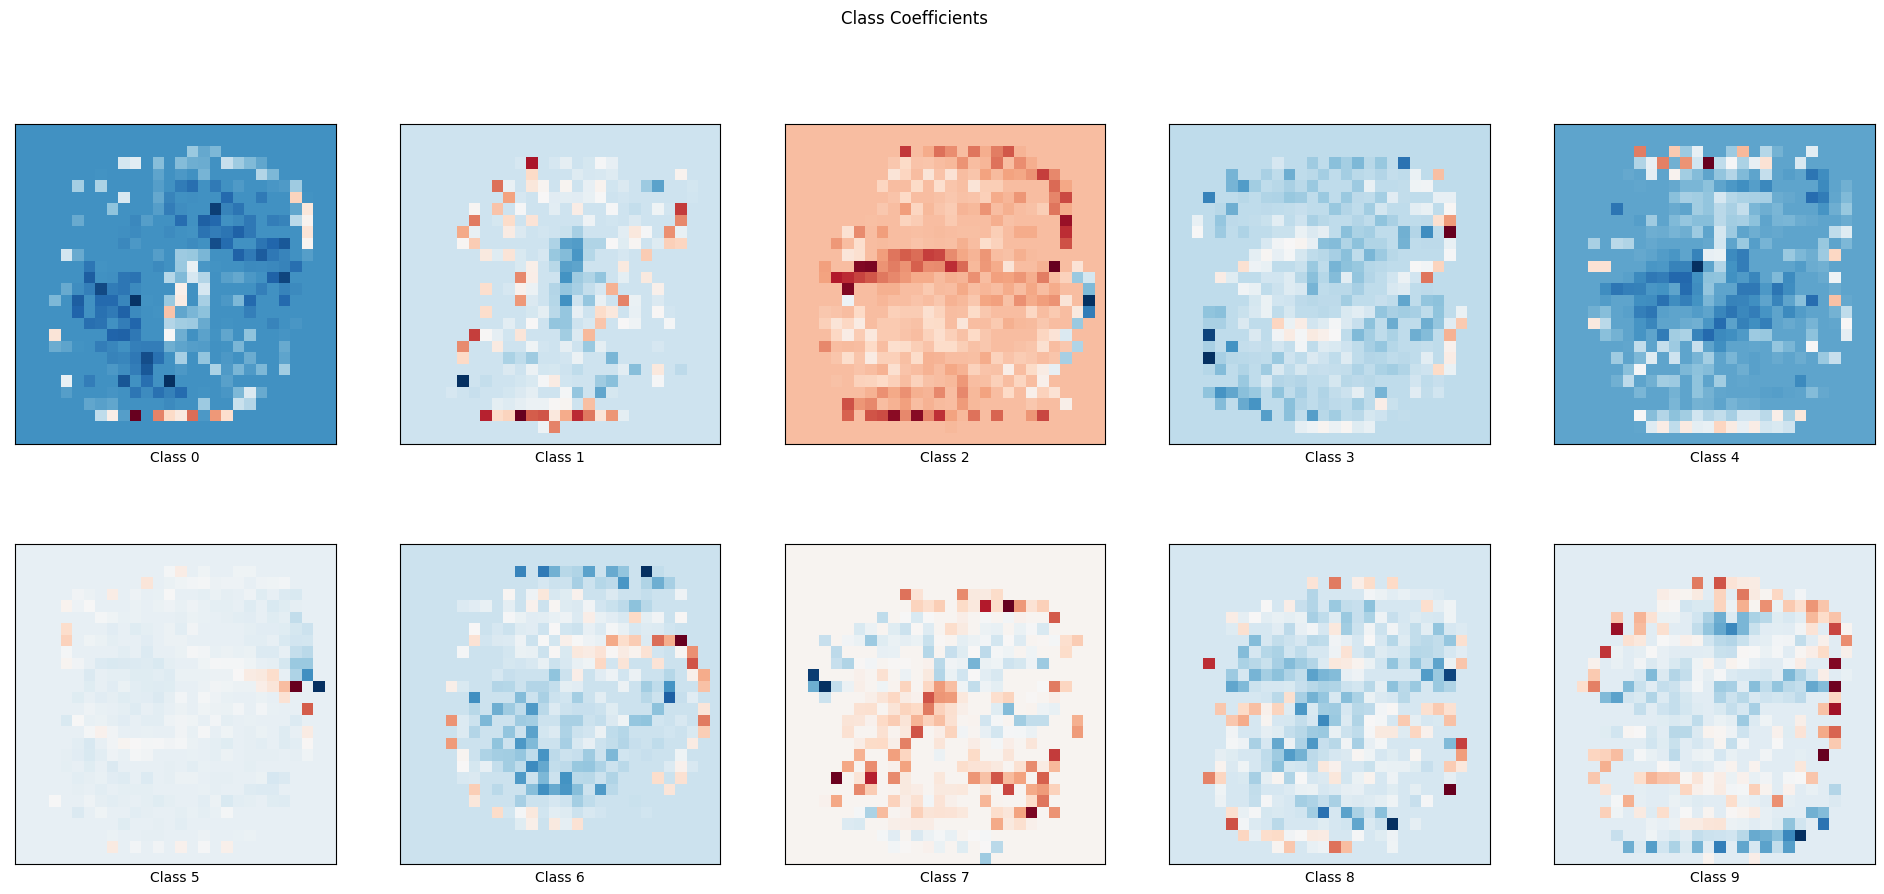

In [ ]:
matplot.subplots(2,5, figsize=(24,10))
for i in range(10):
    l1 = matplot.subplot(2, 5, i + 1)
    l1.imshow(svm_coef[i].reshape(28, 28), cmap=matplot.cm.RdBu)
    l1.set_xticks(())
    l1.set_yticks(())
    l1.set_xlabel('Class %i' % i)
matplot.suptitle('Class Coefficients')
matplot.show()


این نمودار را نیز می‌توان مانند نمودار مربوط به 
$l_2$
(قسمت قبل)
تفسیر کرد و تفاوت‌های آن با مدل‌های دیگر را بیان کرد. در این نمودار نمی‌توان از روی پیکسل‌ها (ضرایب مدل برای فیچرها) به صورت چشمی تشخیص داد که مربوط به چه کلاسی هستند.

ولی در این مورد مقداری ضرایب فیچرها در مدل با مشابه آنها در مدل با رگولاریزیشن 
$l_2$
متفاوت است. تفاوت آنها زیاد نیست ولی تفاوتی را شاهد هستیم.

## Best Model

In [ ]:
svc = LinearSVC(dual=False, C=1,random_state=42)
svc.fit(x_train,y_train)


LinearSVC(C=1, dual=False, random_state=42)

### Classification Report
- Validation Set

In [ ]:
predicted =  svc.predict(x_val)
print(classification_report(y_val,predicted))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1185
           1       0.95      0.97      0.96      1348
           2       0.90      0.89      0.89      1192
           3       0.90      0.89      0.89      1226
           4       0.92      0.93      0.92      1168
           5       0.89      0.87      0.88      1084
           6       0.94      0.95      0.95      1184
           7       0.93      0.92      0.93      1253
           8       0.88      0.85      0.86      1170
           9       0.88      0.89      0.88      1190

    accuracy                           0.91     12000
   macro avg       0.91      0.91      0.91     12000
weighted avg       0.91      0.91      0.91     12000



- Test Set

In [ ]:
predicted = svc.predict(x_test)
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.88      0.91      1032
           3       0.90      0.91      0.90      1010
           4       0.91      0.93      0.92       982
           5       0.89      0.86      0.87       892
           6       0.93      0.95      0.94       958
           7       0.92      0.92      0.92      1028
           8       0.87      0.86      0.87       974
           9       0.89      0.89      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.92      0.92     10000



Refrences:
- [Trying Different Kernels for SVM in MNIST data](https://dmkothari.github.io/Machine-Learning-Projects/SVM_with_MNIST.html)
- [Tensorflow MNIST dataset](https://www.tensorflow.org/datasets/catalog/mnist)
- [MNIST Digit Recognition Kaggle Notebook](https://www.kaggle.com/code/nishan192/mnist-digit-recognition-using-svm/notebook)